<a href="https://www.kaggle.com/code/lorresprz/world-unemployment-1991-2021-arima-forecasting?scriptVersionId=148181819" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-dataset/unemployment analysis.csv


# Loading data

In [3]:
df = pd.read_csv('/kaggle/input/unemployment-dataset/unemployment analysis.csv')

In [4]:
df.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
df = df.drop('Country Code', axis = 1)

In [6]:
df = df.set_index('Country Name')
df = df.T
df.head(10)

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.60,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.80,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.30,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.60,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.70,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.10,13.93,12.38,1.90,17.11,9.30,8.51,...,11.77,12.21,1.93,1.72,5.70,3.47,9.59,29.87,15.30,6.25
1997,7.86,10.78,4.60,4.09,16.88,11.95,1.98,14.82,10.80,8.36,...,11.16,12.12,2.87,1.68,5.70,3.90,10.20,29.91,13.64,6.93
1998,7.81,10.80,4.66,4.07,20.05,11.97,2.14,12.65,9.40,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.00,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.20,6.87,...,14.53,11.50,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.00
2000,7.72,10.81,4.92,4.03,19.03,12.60,2.25,15.00,11.05,6.28,...,13.99,11.11,2.26,1.69,5.77,4.66,11.56,29.88,12.93,5.69


For clarity, we will create subdatasets from the original datasets for ease of analysis later. 

In [7]:
groups = ['Africa Eastern and Southern', 
        'Africa Western and Central', 'Arab World',
        'Central Europe and the Baltics', 
        'Caribbean small states',
        'East Asia & Pacific (excluding high income)',
        'Early-demographic dividend', 'East Asia & Pacific',
        'Europe & Central Asia (excluding high income)',
        'Europe & Central Asia', 
        'Euro area',
        'European Union', 'Fragile and conflict affected situations',
        'High income',
        'Heavily indebted poor countries (HIPC)', 
        'IBRD only', 'IDA & IBRD total', 'IDA total',
        'IDA blend', 'IDA only', 
        'Latin America & Caribbean (excluding high income)', 
        'Latin America & Caribbean',
        'Least developed countries: UN classification', 'Low income',
         'Lower middle income', 'Low & middle income',
         'Late-demographic dividend',  'Middle East & North Africa', 
        'Middle income', 
        'Middle East & North Africa (excluding high income)', 
        'OECD members', 'Other small states',
        'Pre-demographic dividend', 'Pacific island small states',
        'Post-demographic dividend',
        'Sub-Saharan Africa (excluding high income)', 
        'Sub-Saharan Africa', 'Small states',
        'East Asia & Pacific (IDA & IBRD countries)',
        'Europe & Central Asia (IDA & IBRD countries)', 
        'Latin America & the Caribbean (IDA & IBRD countries)',
         'Middle East & North Africa (IDA & IBRD countries)',
        'South Asia (IDA & IBRD)',
        'Sub-Saharan Africa (IDA & IBRD countries)',
        'Upper middle income', 'World']

#This list contains 189 countries
df_c = df.drop(groups, axis = 1)

In [8]:
#Purely based on geography (no differentiation of low/high income status)
sgroup = ['Africa Eastern and Southern', 
        'Africa Western and Central', 
        'Central Europe and the Baltics', 
        'Latin America & Caribbean',
        'Caribbean small states',
        'North America',
        'Sub-Saharan Africa','European Union',
        'Europe & Central Asia',
        'East Asia & Pacific',
        'Sub-Saharan Africa',
        'Middle East & North Africa']
df_g = df[sgroup]

In [9]:
#Based on income status
income = ['High income', 'Low income', 'Lower middle income', 
          'Low & middle income', 'Upper middle income',
          'Heavily indebted poor countries (HIPC)']
df_in = df[income]

# Overview of trends for selected countries and regions

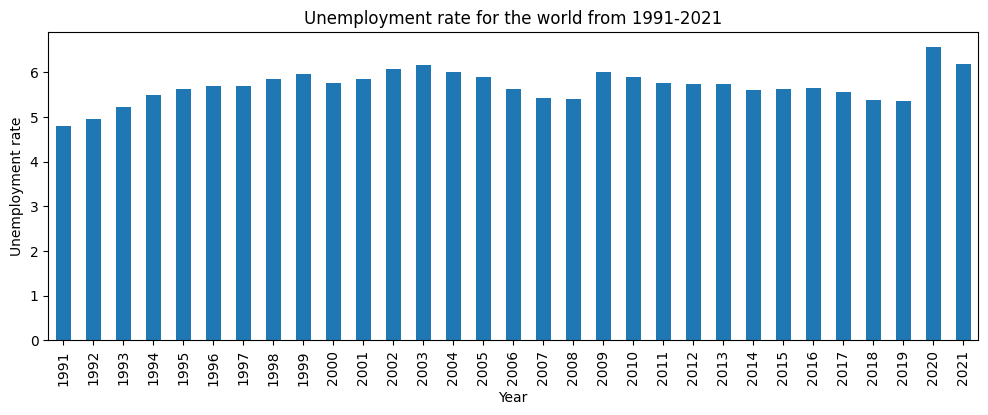

In [10]:
plt.figure(figsize = (12,4));
df['World'].plot(kind = 'bar')
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for the world from 1991-2021');

There are 3 notable peaks in the world's unemployment rate:
- 1. Year 1999: Possibly correlates with the 1997 East Asian financial crisis
- 2. Year 2009: Probably correlates with the 2007-2008 global financial crisis
- 3. Year 2020: Highly likely correlates with the 2020 global pandemic

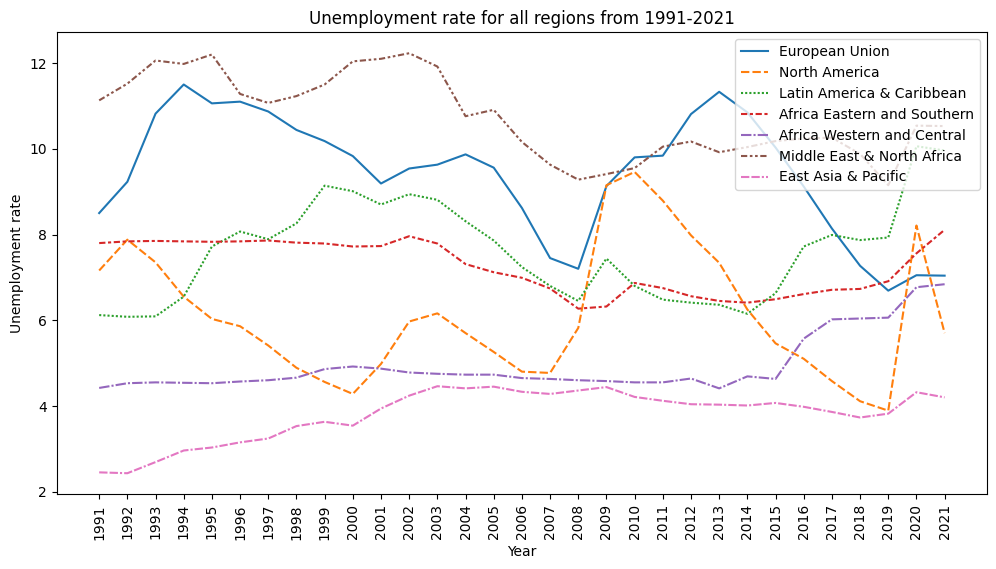

In [11]:
plt.figure(figsize = (12,6));
sns.lineplot(df[['European Union', 'North America','Latin America & Caribbean', 'Africa Eastern and Southern',
                      'Africa Western and Central',  'Middle East & North Africa','East Asia & Pacific']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for all regions from 1991-2021');
plt.legend(loc = 'upper right');

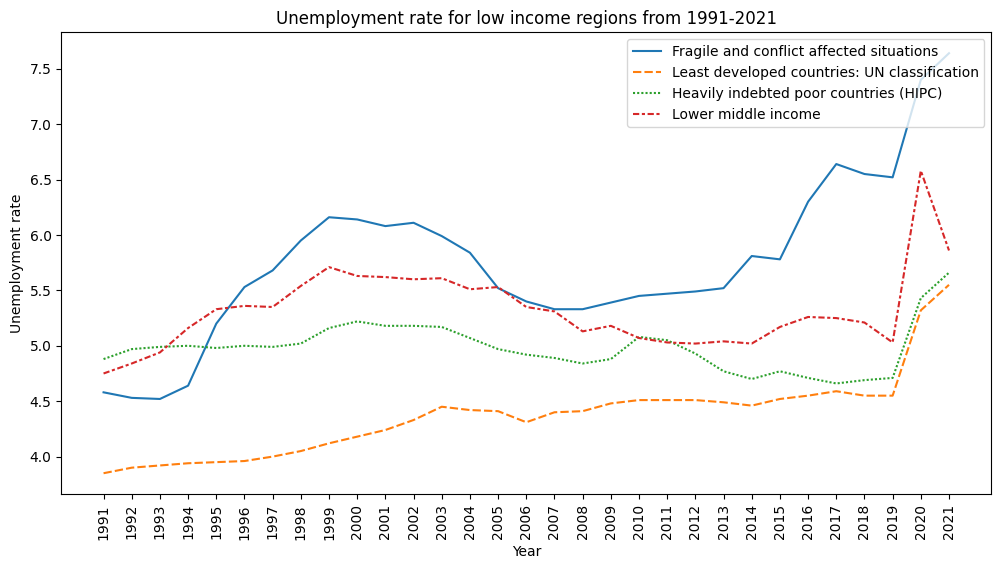

In [12]:
plt.figure(figsize = (12,6));
sns.lineplot(df[['Fragile and conflict affected situations',
                 'Least developed countries: UN classification',
                'Heavily indebted poor countries (HIPC)',
                'Lower middle income']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for low income regions from 1991-2021');
plt.legend(loc = 'upper right');

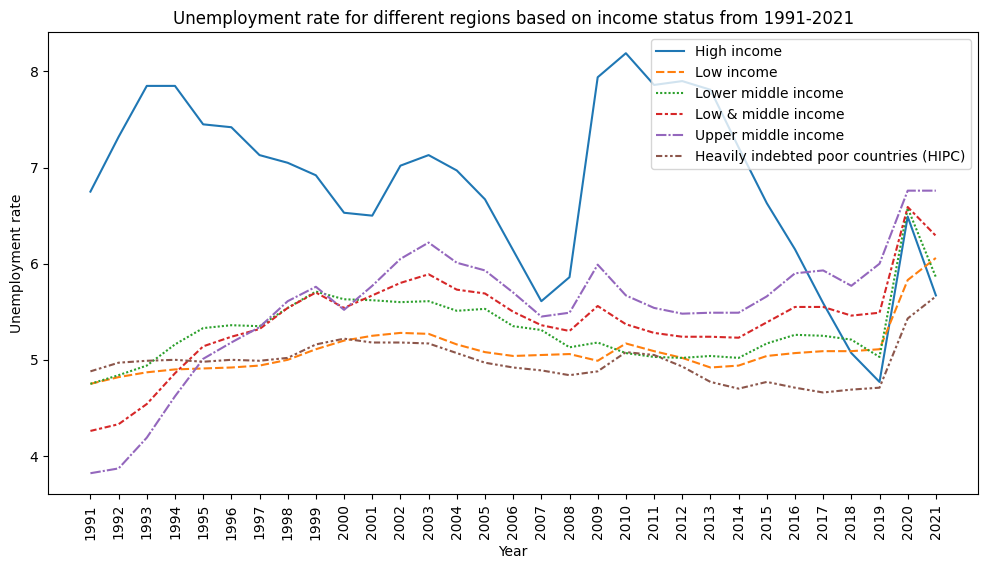

In [13]:
plt.figure(figsize = (12,6));
sns.lineplot(df_in)
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for different regions based on income status from 1991-2021');
plt.legend(loc = 'upper right');

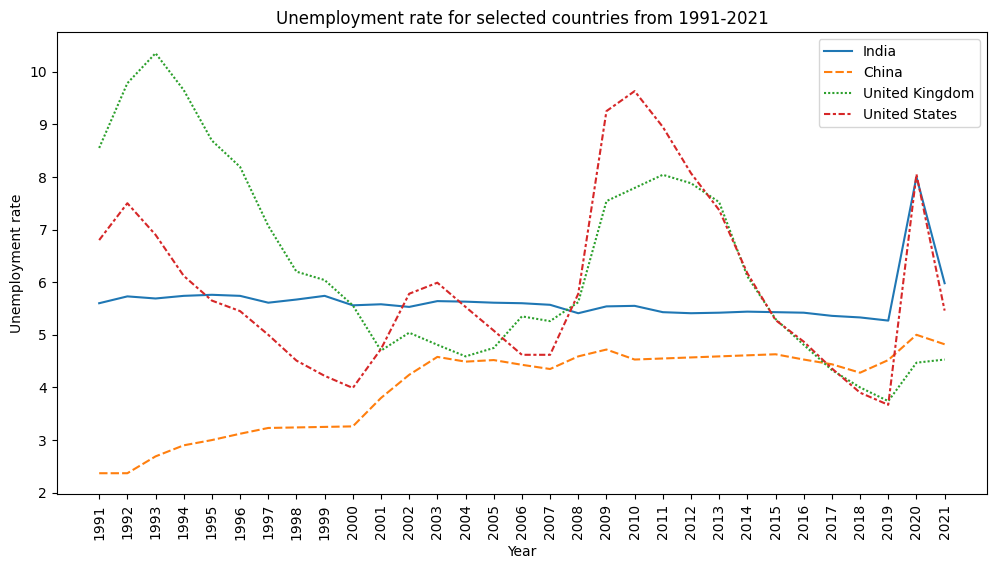

In [14]:
plt.figure(figsize = (12,6));
sns.lineplot(data=df[['India', 'China', 'United Kingdom', 'United States']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for selected countries from 1991-2021');
plt.legend(loc = 'upper right');

# 2009: Aftermath of the 2007-2008 Global Financial Crisis

In [15]:
df_in_09  = df_in.loc['2009']
dfg_09 = df_g.loc['2009']

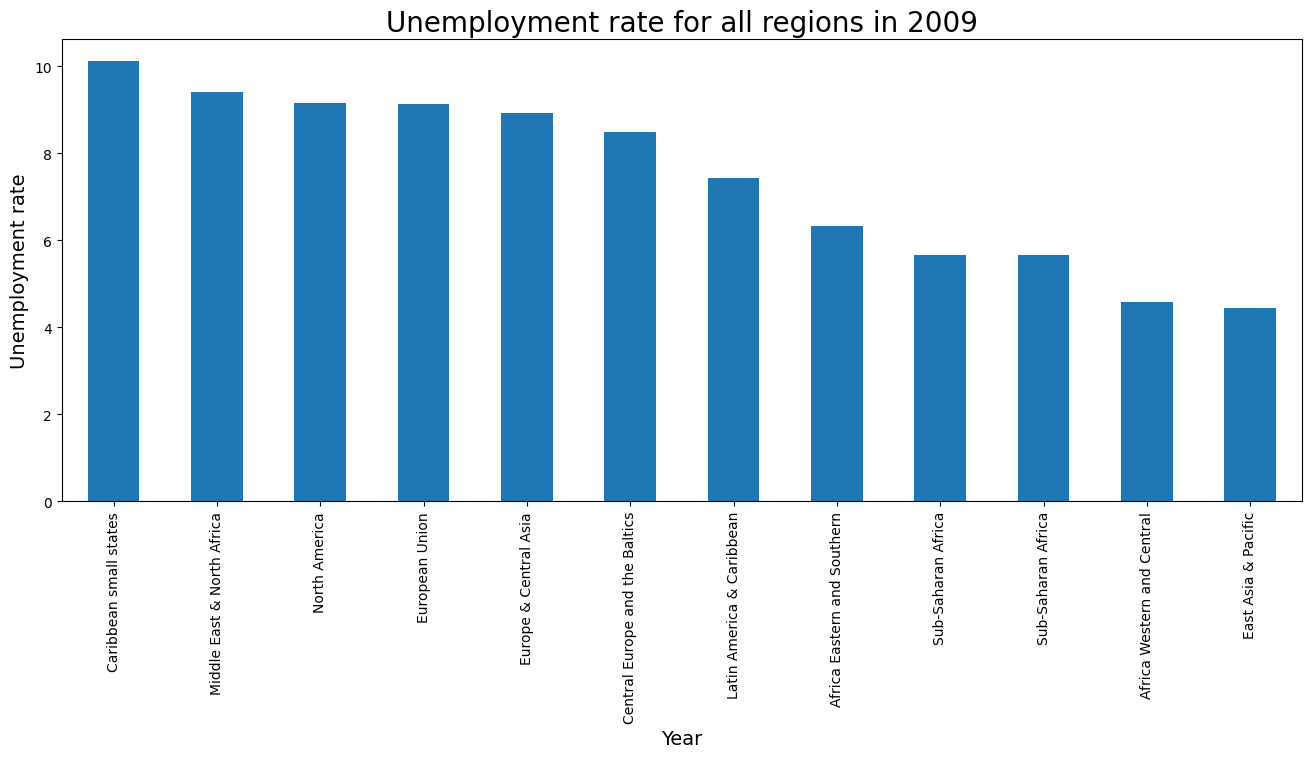

In [16]:
plt.figure(figsize = (16,6));
dfg_09.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year',fontsize = 14);
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate', fontsize = 14);
plt.title('Unemployment rate for all regions in 2009', fontsize=20);

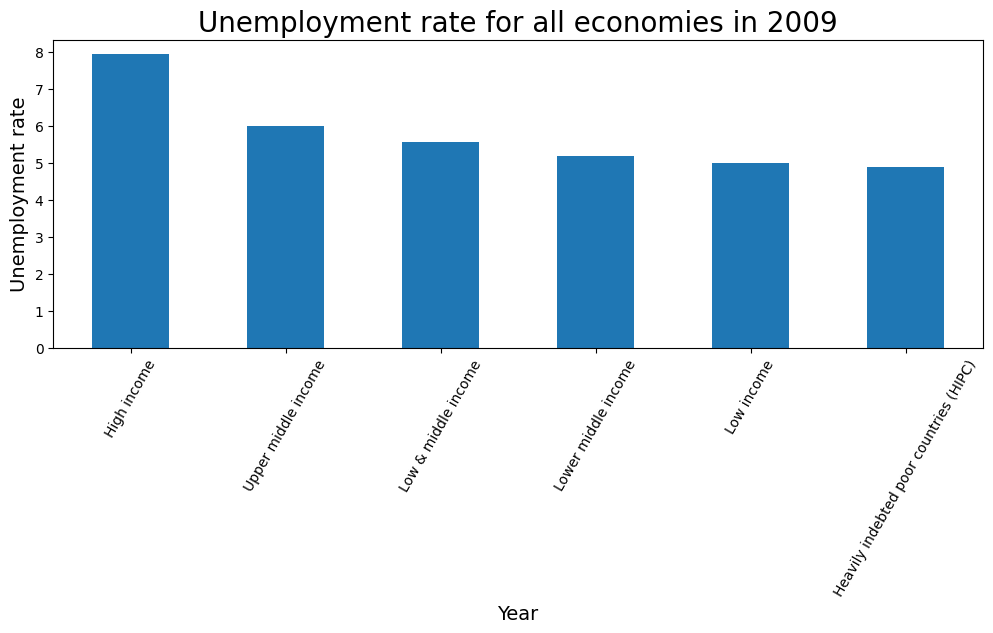

In [17]:
plt.figure(figsize = (12,4));
df_in_09.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year', fontsize = 14);
plt.xticks(rotation=60)
plt.ylabel('Unemployment rate', fontsize = 14);
plt.title('Unemployment rate for all economies in 2009', fontsize = 20);

From the above graph, it seems that high income economies were hit the hardest in the aftermath of the global financial crisis. 

# 2020: Global Pandemic

In [18]:
df_in_20  = df_in.loc['2020']
dfg_20 = df_g.loc['2020']

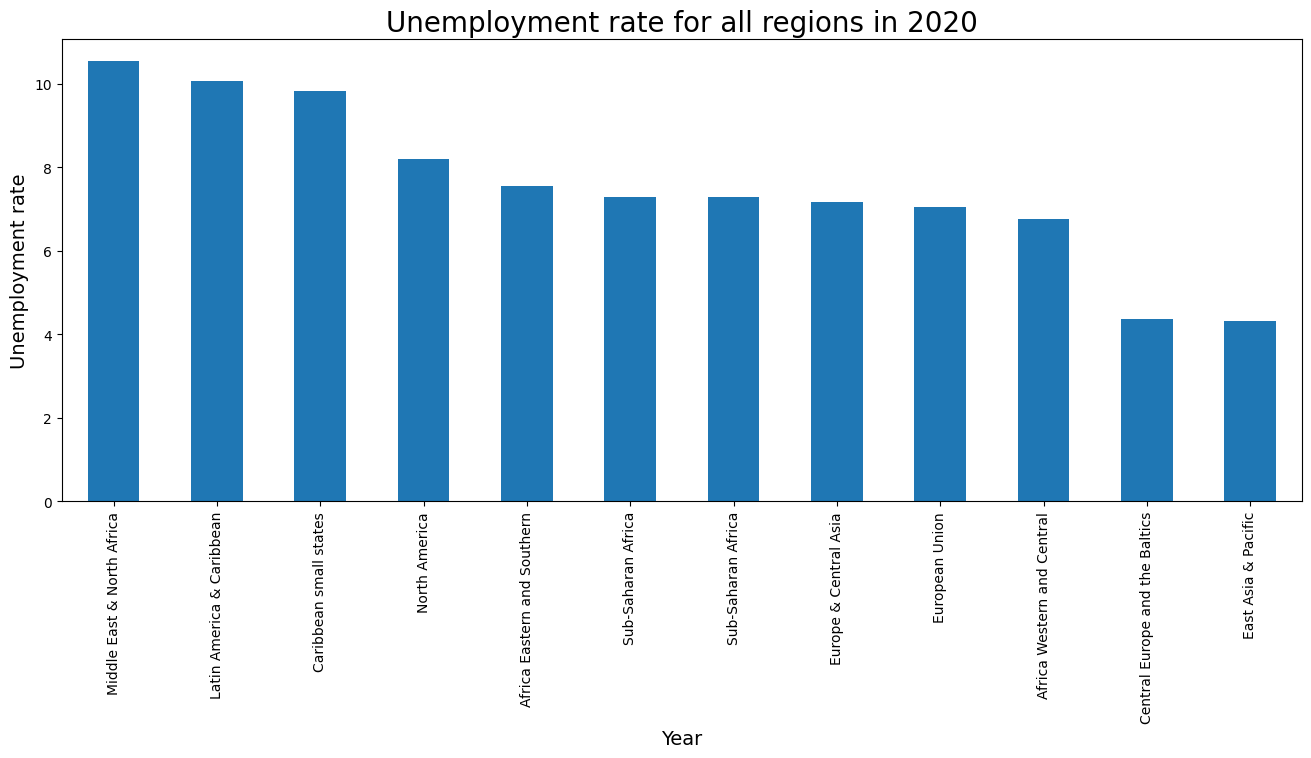

In [19]:
plt.figure(figsize = (16,6));
dfg_20.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year', fontsize = 14);
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate',fontsize = 14);
plt.title('Unemployment rate for all regions in 2020',fontsize = 20);

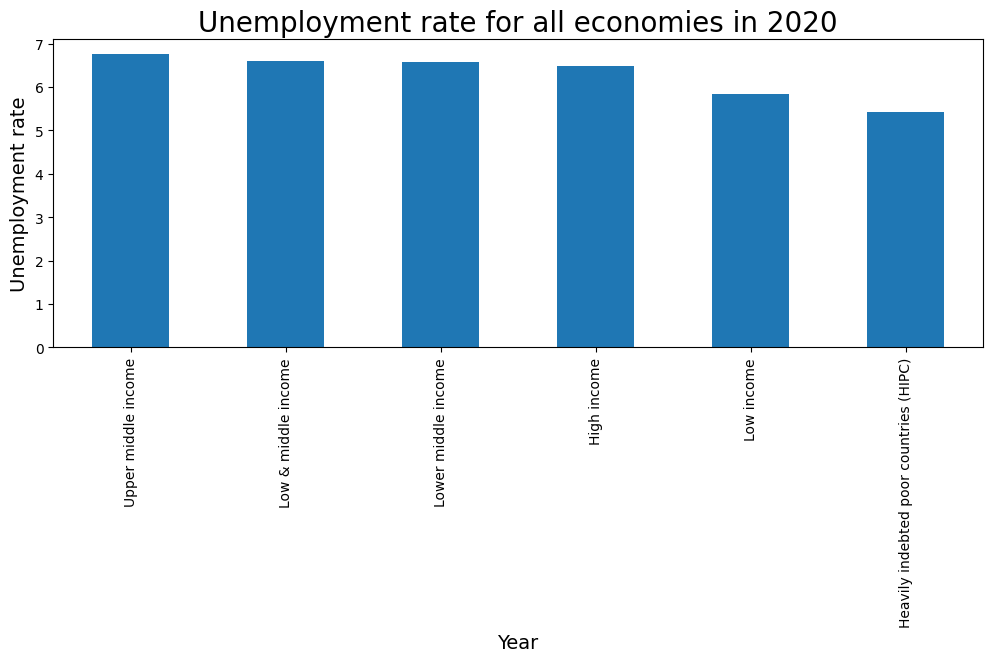

In [20]:
plt.figure(figsize = (12,4));
df_in_20.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year', fontsize = 14);
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate', fontsize = 14);
plt.title('Unemployment rate for all economies in 2020', fontsize = 20);

# Forecasting unemployment trend with ARIMA

In this section we will focus on a few chosen time series representing the unemployment trends in selected countries/regions and perform a forecasting task using ARIMA. The following notes are from **Lazy Programmer's** Udemy Time Series course.

In [21]:
df_fc = df[['India', 'China', 'European Union', 'United States']]

<Figure size 1500x500 with 0 Axes>

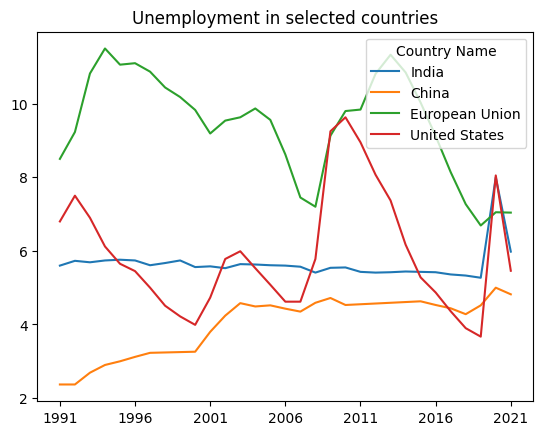

In [22]:
plt.figure(figsize = (15,5))
df_fc.plot();
plt.title('Unemployment in selected countries');

In [23]:
Ntest = 4
train = df_fc.iloc[:-Ntest]
test = df_fc.iloc[-Ntest:]

train_idx = df_fc.index <= train.index[-1]
test_idx = df_fc.index > train.index[-1]

In [24]:
df_fc.columns

Index(['India', 'China', 'European Union', 'United States'], dtype='object', name='Country Name')

In [25]:
def plot_fit_and_forecast(result, df_col):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df_col, label = 'data')
    #plot the fitted curve on the train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color = 'green', label = 'in_sample fitted')
    
    #forecast the test set
    pred_result = result.get_forecast(Ntest)
    #calling conf_int() produces a dataframe with 2 columns: lower & upper values
    #conf_int = pred_result.conf_int()
    #lower, upper = conf_int['lower '+ name], conf_int['upper '+ name]
    forecast = pred_result.predicted_mean
    #plotting the forecasted values
    ax.plot(test.index, forecast, label = 'forecast')
    #create a shaded area in the plot with the confidence interval (alpha = transparency)
    #ax.fill_between(test.index, lower, upper, color = 'blue', alpha = 0.2)
    ax.legend()

## Some preliminary notes on AR, ARMA, ARIMA models

**Autoregressive models** are multiple linear regression models 

$\hat y = w_1 x_1 + \ldots w_p x_p + b $

in which the predictors (the x's in the usual linear regression models) are the past-values of the current value that we try to predict

$\hat{y}_t = b + \phi_1 \,y_{t-1} + \phi_2\, y_{t-2} + \ldots + \phi_p y_{t-p}$

In the above equation, we have AR($p$), an Autoregressive model of order $p$ (in which $p$ past values were used). 

What we actually measure is

$\hat{y}_t = b + \phi_1 \,y_{t-1} + \phi_2\, y_{t-2} + \ldots + \phi_p y_{t-p} + \epsilon_t$,

where $\epsilon_t$ is a noise term with the distribution $N(0,\sigma^2)$.

**Moving average model of order q, MA($q$) model**: This is not SMA (simple moving average) or EWMA (Exponentially Weighted Moving Average). Instead, this is similar to AR model in that it is a linear function of past error terms:

$y_t = c + \epsilon_t + \theta_1\epsilon_{t-1} + \ldots + \theta_q \epsilon_{t-q}$

There is no dependency on data, only on error terms. 

**Autoregressive Moving Average model, ARMA(p,q)**

ARMA(p,q) = AR(p) + MA(q)

$ y_t = \left(b+ \phi_1 y_{t-1} +\ldots + \phi_p y_{t-p}\right)
        + \left(\theta_1 \epsilon_{t-1} + \ldots + \theta_q \epsilon_{t-q}\right) + \epsilon_t$
        
**ARIMA(p,d,q): Autoregressive Integrated Moving Average**

How does the "integrated" part work? 
 
- A process that is differenced $d$ times and remains the same is called an I($d$) model - It is said to be integrated to order $d$
- *An **ARIMA(p,d,q) model** is a model where we have differenced $d$ times before applying ARMA(p,q)*
- All other cases that we have discussed are special cases of ARIMA(p,d,q)
   - ARIMA(p,0,0)= ARMA(p,0) = AR(p)
   - ARIMA(0,0,q)= ARMA(0,q) = MA(q)
   - ARIMA(0,d,0) = I(d)
   - ARIMA(0,1,0) = I(1) is a random walk. 

**Choosing (p,d,q) parameters in ARIMA models**

- 1. *ADF test* is used to determine the $d$ parameter in ARIMA($p,d,q$). By performing the test to check if the time series is stationary or not, we keep differencing the series until it becomes stationary - $d$ is chosen to be the number of times it takes for the test to become stationary.

- 2. *ACF - Autocorrelation Function* is used to determine $q$ in ARIMA($p,d,q)$

- 3. *PACF - Partial Autocorrelation Function* is used to determine $p$ in ARIMA($p,d,q$)

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [27]:
def adf(x):
    res = adfuller(x)
    print("Test-statistic:", res[0])
    print("p-value:", res[1])
    if res[1] <0.05:
        print('Stationary')
    else:
        print('Non-stationary')

# Forecasting for China unemployment

In [28]:
adf(df['China'])

Test-statistic: -2.3311948546050494
p-value: 0.1621042676181333
Non-stationary


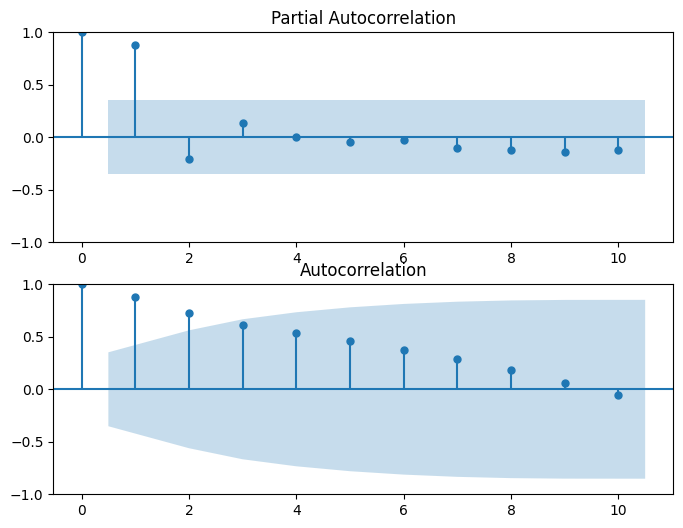

In [29]:
fig,ax = plt.subplots(2,1, figsize=(8,6))
#p value in ARIMA(d,p,q)
plot_pacf(df['China'], lags = 10, ax = ax[0]);
#q_value in ARIMA(d,p,q)
plot_acf(df['China'], lags =10, ax = ax[1]);

In [30]:
arima_C = ARIMA(train['China'],order = (7,1,1))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [31]:
arima_result_C = arima_C.fit()

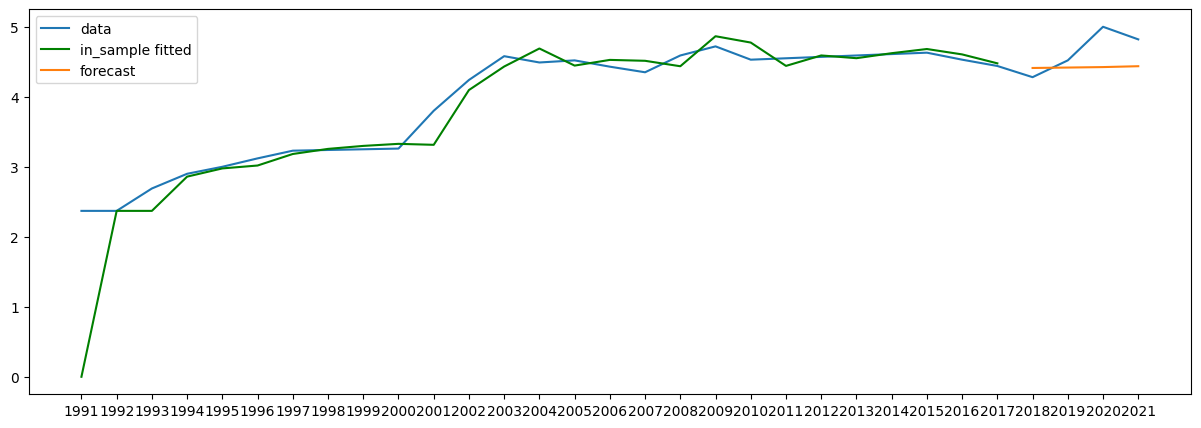

In [32]:
plot_fit_and_forecast(arima_result_C, df_fc['China'])

# Forecasting for India unemployment

In [33]:
 adf(df['India'])

Test-statistic: -4.822366243603736
p-value: 4.927378905771824e-05
Stationary


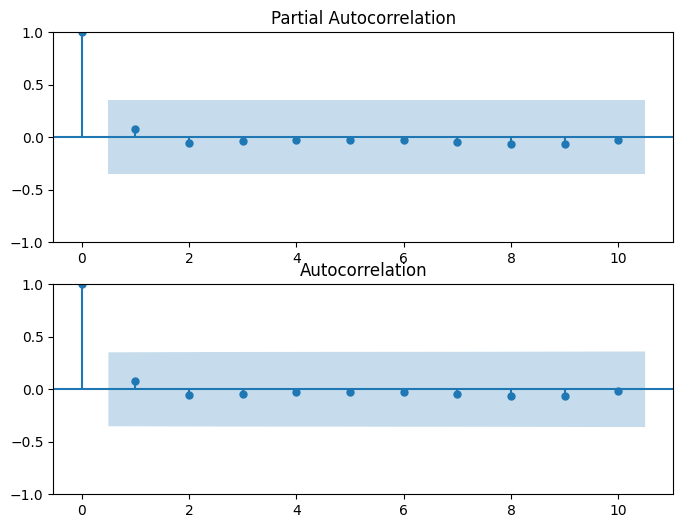

In [34]:
fig,ax = plt.subplots(2,1, figsize=(8,6))
#p value in ARIMA(d,p,q)
plot_pacf(df_fc['India'], lags = 10, ax = ax[0]);
#q_value in ARIMA(d,p,q)
plot_acf(df_fc['India'], lags =10, ax = ax[1]);

In [35]:
arima_I = ARIMA(train['India'],order = (1,1,1))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [36]:
arima_result_I = arima_I.fit()

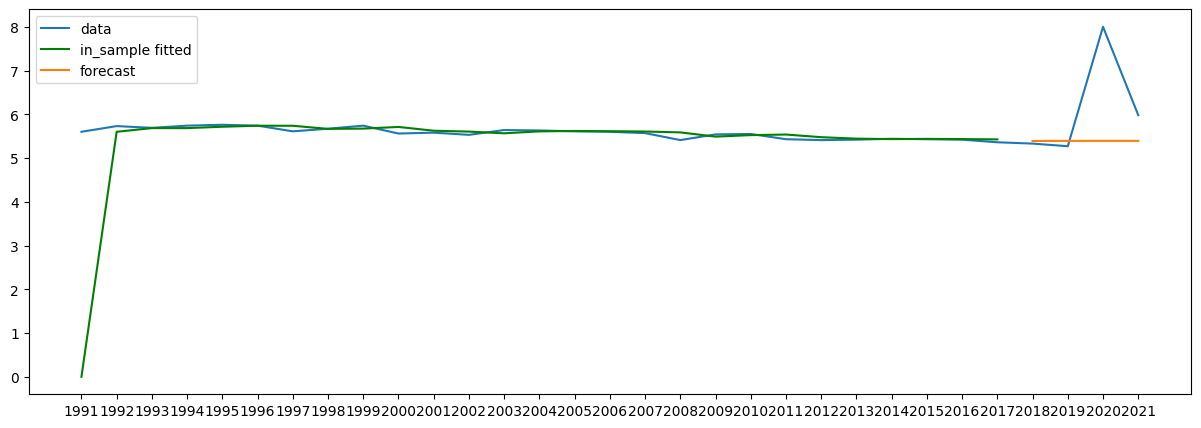

In [37]:
plot_fit_and_forecast(arima_result_I, df_fc['India'])

# Forecasting for US unemployment

In [38]:
 adf(df['United States'])

Test-statistic: -2.304539022988512
p-value: 0.170508225135597
Non-stationary


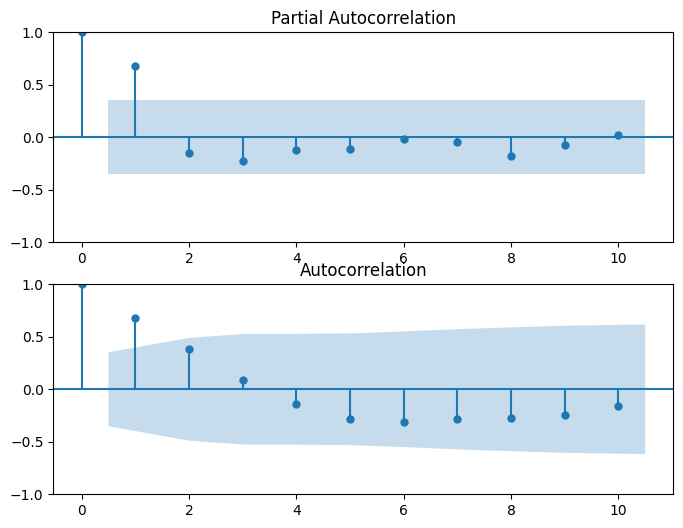

In [39]:
fig,ax = plt.subplots(2,1, figsize=(8,6))
#p value in ARIMA(d,p,q)
plot_pacf(df_fc['United States'], lags = 10, ax = ax[0]);
#q_value in ARIMA(d,p,q)
plot_acf(df_fc['United States'], lags =10, ax = ax[1]);

In [40]:
arima_U = ARIMA(train['United States'],order = (5,1,1))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [41]:
arima_result_U = arima_U.fit()

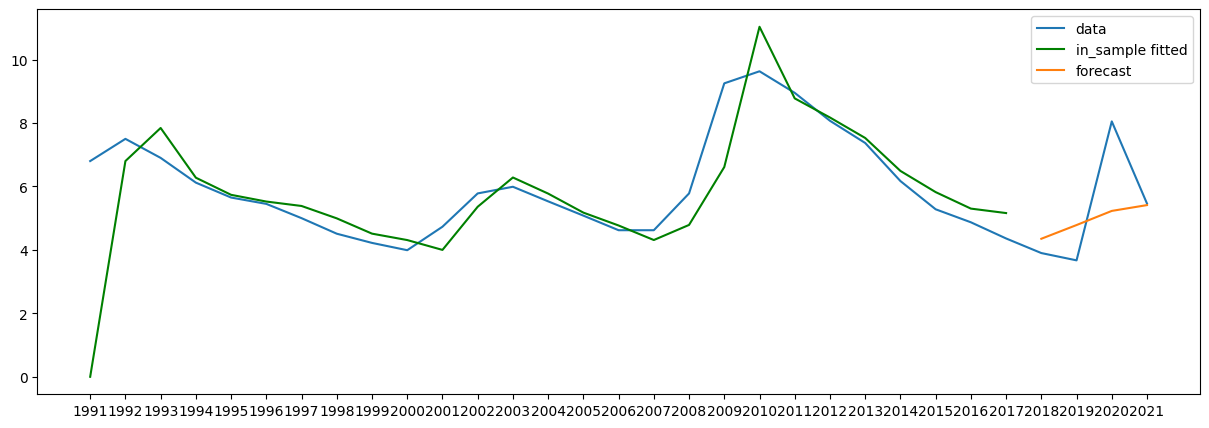

In [42]:
plot_fit_and_forecast(arima_result_U, df_fc['United States'])

In [43]:
 adf(df['European Union'])

Test-statistic: -2.4965644242784477
p-value: 0.11631247681740847
Non-stationary
